In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv")
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [3]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      PID  ST_NUM  ST_NAME  OWN_OCCUPIED  NUM_BEDROOMS  NUM_BATH  SQ_FT
0  False   False    False         False         False     False  False
1  False   False    False         False         False     False  False
2  False    True    False         False          True     False  False
3  False   False    False         False         False      True  False
4   True   False    False         False         False     False  False
5  False   False    False         False          True     False  False
6  False    True    False          True         False     False  False
7  False   False    False         False         False     False   True
8  False   False    False         False         False     False  False>

In [4]:
df.shape

(9, 7)

In [5]:
df.describe()

,PID,ST_NUM
count,8.000000e+00,7.000000
mean,1.000050e+08,191.428571
std,2.927700e+03,39.080503
min,1.000010e+08,104.000000
25%,1.000028e+08,199.000000
50%,1.000050e+08,203.000000
75%,1.000072e+08,210.000000
max,1.000090e+08,215.000000


In [6]:
missing_values = ["n/a","na","--"]
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv", na_values = missing_values)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  5 non-null      float64
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         7 non-null      float64
dtypes: float64(4), object(3)
memory usage: 632.0+ bytes


In [8]:
df["ST_NUM"]

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [9]:
df["ST_NUM"].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [10]:
df["OWN_OCCUPIED"]

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [11]:
df.isna().values.sum()

11

In [12]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [13]:
df.isnull().sum().sum #total missing value

<bound method NDFrame._add_numeric_operations.<locals>.sum of PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64>

In [14]:
df["OWN_OCCUPIED"].nunique()

3

In [15]:
df[["ST_NAME","OWN_OCCUPIED"]].describe()

,ST_NAME,OWN_OCCUPIED
count,9,8
unique,5,3
top,BERKELEY,Y
freq,3,5


## Replacing

In [16]:
df["ST_NUM"].fillna(100, inplace =True)

In [17]:
df["ST_NUM"]

0    104.0
1    197.0
2    100.0
3    201.0
4    203.0
5    207.0
6    100.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [18]:
df.loc[2,"ST_NUM"] = 199

In [19]:
df["ST_NUM"]

0    104.0
1    197.0
2    199.0
3    201.0
4    203.0
5    207.0
6    100.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [20]:
median = df["NUM_BEDROOMS"].median()
df["NUM_BEDROOMS"].fillna(median, inplace=True)

In [21]:
help(pd.DataFrame).fillna()

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index.
 |  
 |      .. versionchanged:: 0.25.0
 |         If 

AttributeError: 'NoneType' object has no attribute 'fillna'

## Obesity

In [34]:
data = pd.ExcelFile("E:\euy\KAMPUS MERDEKA\TESTING\obes.xls")
data

In [35]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [37]:
data.parse(u"7.2")

,"Table 7.2 Finished Admission Episodes with a primary diagnosis of obesity, by age group, 2002/03 to 2012/13",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,England,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Numbers
3,NaN,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2002/03,1275,400,65,136,289,216,94,52,23
6,2003/04,1711,579,67,174,391,273,151,52,24
7,2004/05,2035,547,107,287,487,364,174,36,32
8,2005/06,2564,583,96,341,637,554,258,72,20
9,2006/07,3862,656,184,461,1069,872,459,118,43


In [43]:
data1 = pd.read_excel("E:\euy\KAMPUS MERDEKA\TESTING\obes.xls",
                      sheet_name="7.2",skiprows=5,skipfooter=14)
data1

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2002/03,1275,400,65,136,289,216,94,52,23
1,2003/04,1711,579,67,174,391,273,151,52,24
2,2004/05,2035,547,107,287,487,364,174,36,32
3,2005/06,2564,583,96,341,637,554,258,72,20
4,2006/07,3862,656,184,461,1069,872,459,118,43
5,2007/08,5018,747,228,564,1469,1198,598,157,53
6,2008/09,7988,775,322,1013,2359,2133,1099,221,63
7,2009/10,10571,632,361,1348,3132,3076,1555,378,87
8,2010/11,11574,525,375,1425,3277,3573,1820,456,115
9,2011/12,11736,495,391,1484,3104,3581,2119,468,94


In [50]:
data_age = data.parse(u"7.2",skiprows=4,skipfooter=14)

In [51]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [52]:
data_age.shape

(12, 10)

In [53]:
data_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11 non-null     object 
 1   Total        11 non-null     float64
 2   Under 16     11 non-null     float64
 3   16-24        11 non-null     float64
 4   25-34        11 non-null     float64
 5   35-44        11 non-null     float64
 6   45-54        11 non-null     float64
 7   55-64        11 non-null     float64
 8   65-74        11 non-null     float64
 9   75 and over  11 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1.1+ KB


In [72]:
data_age =data_age.rename({"Unnamed: 0":"Year"},axis=1)
data_age.head()

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
1,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
3,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
4,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


In [73]:
data_age = data_age.dropna(how="all",axis=0)

In [68]:
data_age.reset_index(drop=True, inplace=True)

In [69]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
1,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
3,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
4,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


In [77]:
data_age.iloc[:,2].sum()

data_age.iloc[:,2:].sum(axis=1)

6495.0

<Axes: >

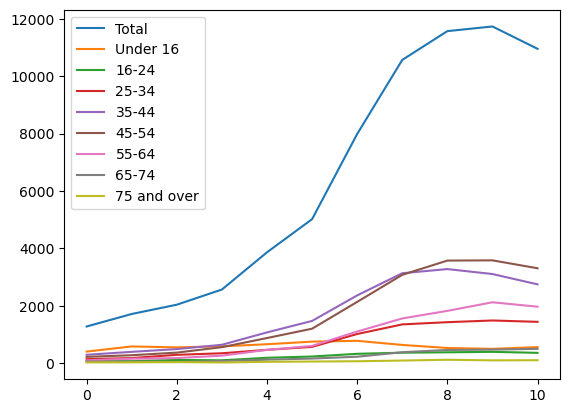

In [78]:
data_age.plot()

In [84]:
data_age_minus_total = data_age.drop("Total",axis=1)

<Axes: >

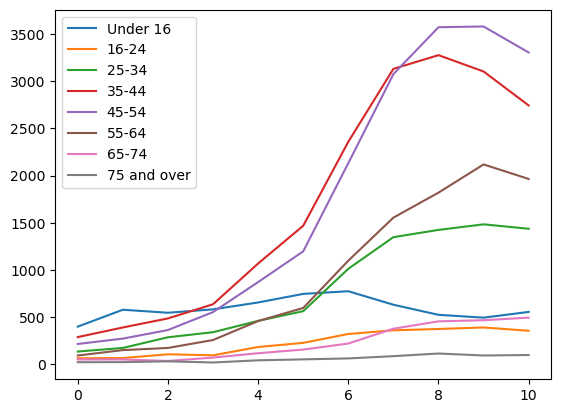

In [86]:
data_age_minus_total.plot()

<Axes: >

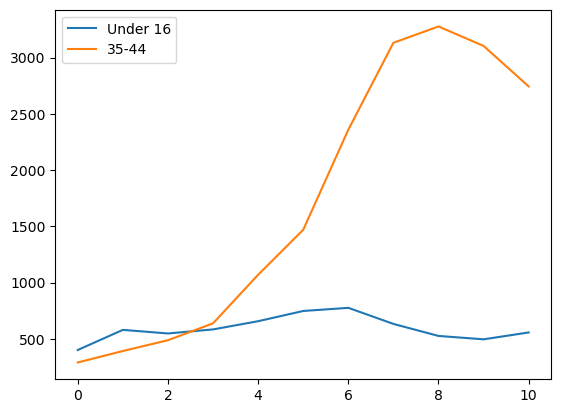

In [87]:
data_age['Under 16'].plot(label="Under 16",legend =True)
data_age['35-44'].plot(label="35-44", legend= True)

In [88]:
from datetime import datetime

In [116]:
# pd.date_range("12/1/2020","12/13/2020") ymd atau mdy
# pd.date_range("1/12/2020","13/12/2020")
date_rng = pd.date_range("1/01/2020","01/18/2020",freq="H")

In [117]:
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-17 15:00:00', '2020-01-17 16:00:00',
               '2020-01-17 17:00:00', '2020-01-17 18:00:00',
               '2020-01-17 19:00:00', '2020-01-17 20:00:00',
               '2020-01-17 21:00:00', '2020-01-17 22:00:00',
               '2020-01-17 23:00:00', '2020-01-18 00:00:00'],
              dtype='datetime64[ns]', length=409, freq='H')

In [118]:
df1= pd.DataFrame(date_rng,columns=["date"])

In [119]:
df1["data1"] = np.random.randint(0,100,size=(len(date_rng)))

In [121]:
df1["datetime"] = pd.to_datetime(df1['date'])

In [123]:
df1=df1.set_index('datetime')

In [125]:
df1.drop(['date'],axis=1,inplace=True)

In [126]:
df1.head()

,data1
datetime,
2020-01-01 00:00:00,62
2020-01-01 01:00:00,1
2020-01-01 02:00:00,63
2020-01-01 03:00:00,79
2020-01-01 04:00:00,14


In [127]:
string_date_rng = [str(x)for x in date_rng]

In [128]:
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17: